In [389]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
from sklearn import datasets
from sklearn.neighbors import KernelDensity
from scipy.stats.kde import gaussian_kde

%matplotlib inline

In [390]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_y = np.append(X, y.reshape(150,1), axis=1)


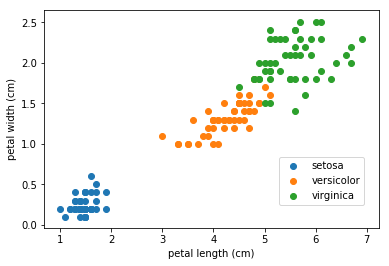

In [391]:
for i in range(y.max()+1):
    plt.scatter(X_y[X_y[:,4] == i][:,2],X_y[X_y[:,4] == i][:,3], label=iris.target_names[i])
plt.legend(numpoints=1,bbox_to_anchor=(0.97,0.35))
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


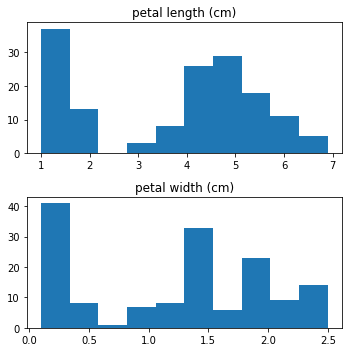

In [392]:
f, axarr = plt.subplots(2, figsize=(5,5))

for i in range(2):
    axarr[i].hist(X[:,2 + i])
    axarr[i].set_title(iris.feature_names[2 + i])

plt.tight_layout()

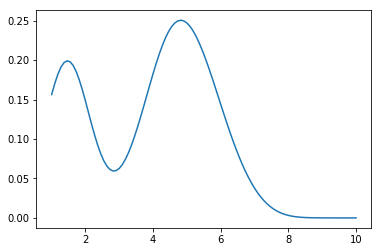

In [393]:
#f, axarr = plt.subplots(2, figsize=(5,5))

#for i in range(2):
#    pdf = gaussian_kde(X[:,2 + i])
#    axarr[i].plot(pdf(np.linspace(10,10,100)))
#    axarr[i].set_title(iris.feature_names[2 + i])

#plt.tight_layout()

pdf = gaussian_kde(X[:, 2])
plt.plot(np.linspace(1,10,100), pdf(np.linspace(1,10,100)))

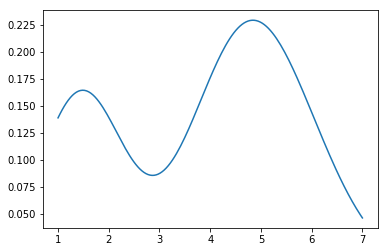

In [394]:
k = KernelDensity(bandwidth=0.8).fit(X[:, 2].reshape(150,-1))
plt.plot(np.linspace(1,7,150), np.exp(k.score_samples(np.linspace(1,7,150).reshape(150,-1))))

In [438]:
delta = 0.025
x = np.arange(1.0, 3.0, 1)
y = np.arange(1.0, 3.0, 1)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx*yy)
#Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
#Z = 10.0 * (Z2 - Z1)

(2, 2)

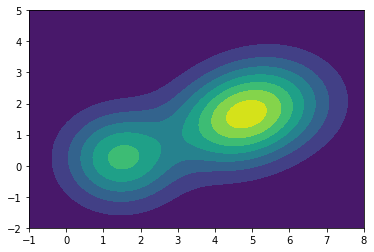

In [491]:
x = np.linspace(-1, 8, 100)
y = np.linspace(-2, 5, 100)
xx, yy = np.meshgrid(x, y)
sum_z=np.zeros([100,100])
for i in range(3):
    zz = np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))
    a = KernelDensity().fit(X_y[X_y[:,4] == i][:,2:4])
    z = np.exp(a.score_samples(zz)).reshape(100,100)
    sum_z = np.add(sum_z, z)
    plt.contourf(xx,yy,sum_z)

In [480]:
np.sum([np.zeros([100,100]), np.ones([100,100])])

10000.0

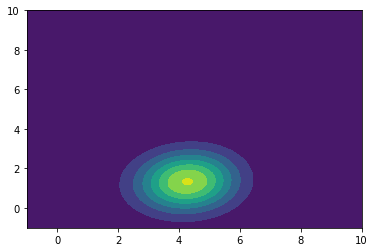

In [466]:
zz = np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))
a = KernelDensity().fit(X[51:100,2:4])
z = np.exp(a.score_samples(zz)).reshape(100,100)
plt.contourf(xx,yy,z)

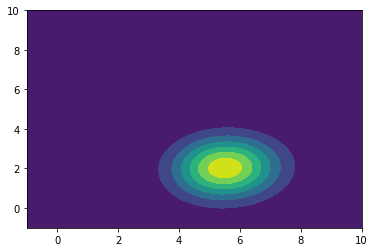

In [467]:
zz = np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))
a = KernelDensity().fit(X[100:150,2:4])
z = np.exp(a.score_samples(zz)).reshape(100,100)
plt.contourf(xx,yy,z)

In [448]:
z.shape

(100, 100)

In [365]:
xx.ravel(), yy

[0.0, 1.0]

In [263]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)


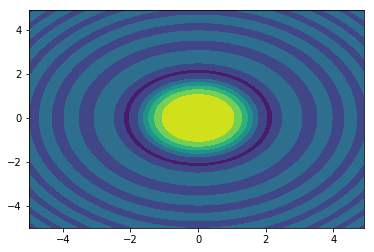

In [186]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [187]:
np.argmax(z)

5050

In [196]:
z[50,50]

1.0

(array([ 17.,   8.,  13.,  12.,   6.,   9.,   5.,  14.,  10.,   6.]),
 array([-0.05796845, -0.04727231, -0.03657617, -0.02588002, -0.01518388,
        -0.00448774,  0.0062084 ,  0.01690454,  0.02760068,  0.03829682,
         0.04899297]),
 <a list of 10 Patch objects>)

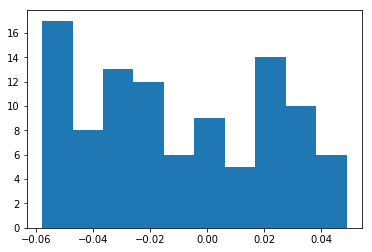

In [188]:
plt.hist(z.ravel()[950:1050])

(array([  5.,  11.,  44.,  63.,  89.,  75.,  64.,  40.,  85.,  24.]),
 array([-3.77259276, -3.21444676, -2.65630076, -2.09815476, -1.54000877,
        -0.98186277, -0.42371677,  0.13442922,  0.69257522,  1.25072122,
         1.80886722]),
 <a list of 10 Patch objects>)

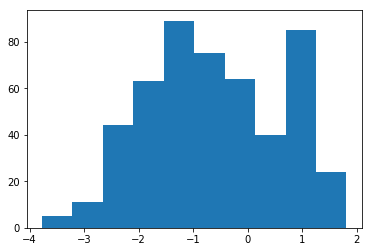

In [34]:
plt.hist(y)

In [7]:
# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
#fig, ax = plt.subplots(1, 4, sharey=True,
#                       figsize=(13, 3))
#fig.subplots_adjust(wspace=0)



In [368]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [369]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [384]:
values.shape

(2, 2000)

In [370]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

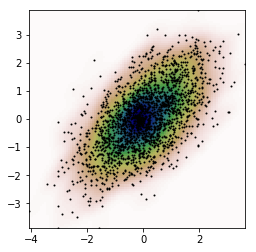

In [371]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()